## Observations and Insights 

In [250]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
print(mouse_metadata_df)
#study_results_df = pd.read_csv(study_results_path)
#print(study_results_df)
# Combine the data into a single dataset


# Display the data table for preview


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]


In [251]:
##get an idea of the unique features in the mouse metadata
mouse_metadata_df.nunique()

Mouse ID        249
Drug Regimen     10
Sex               2
Age_months       24
Weight (g)       16
dtype: int64

In [252]:
##read and display study results seperately for clarity
study_results_df = pd.read_csv(study_results_path)
print(study_results_df)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]


In [253]:
## get an idea of the unique features in the study_results_df
study_results_df.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [254]:
# Combine the data into a single dataset
mouse_mdata_and_study_results_df = pd.merge(study_results_df,mouse_metadata_df, how="left", on="Mouse ID")
mouse_mdata_and_study_results_df.columns
mouse_mdata_and_study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [255]:
# Check the number of mice.
len(mouse_mdata_and_study_results_df["Mouse ID"].unique())

249

In [256]:
##get a view of mouse_mdata_and_study_results_df usinf .shape
mouse_mdata_and_study_results_df.shape

(1893, 8)

In [257]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
#mouse_mdata_and_study_results_df.loc[mouse_mdata_and_study_results_df.duplicated(keep='first'), :]
duplicate_mouse_id = mouse_mdata_and_study_results_df.loc[mouse_mdata_and_study_results_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [258]:
## i want to get an idea of how times the duplicate appears
#mouse_mdata_and_study_results_df.duplicated(subset=['Mouse ID','Timepoint']).sum()

In [259]:
# Drop any duplicate rows
#mouse_mdata_and_study_results_df.drop_duplicates(subset=['Mouse ID','Timepoint'],inplace=True)
#mouse_mdata_and_study_results_df.drop_duplicates(keep='first').inplace=True
drop_mouse_mdata_and_study_results_df = mouse_mdata_and_study_results_df[mouse_mdata_and_study_results_df['Mouse ID'].isin(duplicate_mouse_id)==False]
drop_mouse_mdata_and_study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [260]:
# Recheck the number of mice
len(drop_mouse_mdata_and_study_results_df["Mouse ID"].unique())

248

In [261]:
##visualise gender count
sort_gender = mouse_mdata_and_study_results_df.groupby("Sex").count()
gender = [sort_gender["Mouse ID"]]
gender

[Sex
 Female    935
 Male      958
 Name: Mouse ID, dtype: int64]

In [262]:
mouse_mdata_and_study_results_df.shape

(1893, 8)

## Summary Statistics

In [263]:
# Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen.
drug_regimen_group = mouse_mdata_and_study_results_df.groupby(["Drug Regimen"])
drug_regimen_group
drug_regimen_mean = drug_regimen_group["Tumor Volume (mm3)"].mean()# looks for the tumor V mean
drug_regimen_median = drug_regimen_group["Tumor Volume (mm3)"].median()# looks for the tumor V median
drug_regimen_variance = drug_regimen_group["Tumor Volume (mm3)"].var()# looks for the tumor V variance
drug_regimen_std = drug_regimen_group["Tumor Volume (mm3)"].std()# looks for the tumor V standard deviation
drug_regimen_sem = drug_regimen_group["Tumor Volume (mm3)"].sem()# looks for the tumor V SEM
stats_data = pd.DataFrame({"Mean Tumor":drug_regimen_mean,"Median Tumor":drug_regimen_median,"Variance Tumor":drug_regimen_variance,"Standard Deviation Tumor":drug_regimen_std,"SEM Tumor":drug_regimen_sem,})
stats_data

# to be continued 



,Mean Tumor,Median Tumor,Variance Tumor,Standard Deviation Tumor,SEM Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [264]:
# create a statistics summary by using the groupby and aggregate method 
stats_summary_agg = mouse_mdata_and_study_results_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
stats_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

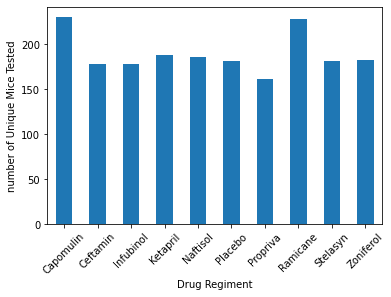

In [265]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
bar_plot = mouse_mdata_and_study_results_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_plot.plot(kind="bar")
plt.xlabel("Drug Regiment")
plt.xticks(rotation=45)
plt.ylabel("number of Unique Mice Tested")
plt.show()

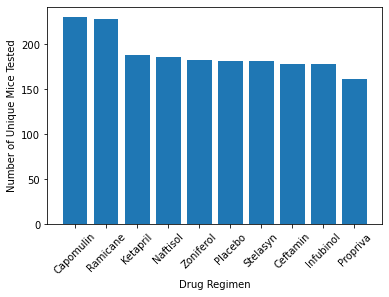

In [266]:
# General identical bar plot using pyplot instead of pandas.

counts = mouse_mdata_and_study_results_df["Drug Regimen"].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xticks(rotation=45)
plt.show()

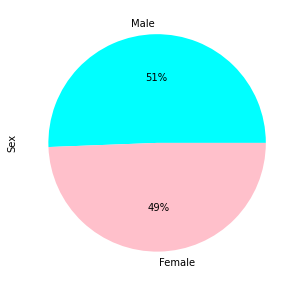

In [267]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["aqua","pink"]
counts = mouse_mdata_and_study_results_df.Sex.value_counts()
counts.plot(kind="pie",autopct='%0.0f%%',colors=colors,figsize=(5,5))
#explode=(0,0.1,0,0),shadow=True

Text(0, 0.5, 'Sex')

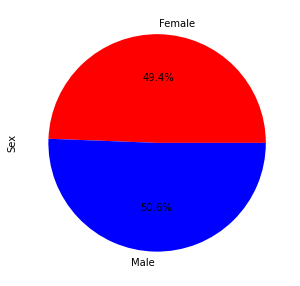

In [268]:
# Generate identical pie plot using pyplot
colors = ["red","blue"]
pyplot = sort_gender["Mouse ID"].plot.pie(figsize=(5, 5),colors=colors, autopct="%1.1f%%")
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [269]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
## to get the maximum timepoint, we implement the 'Groupby' method usung the 'Mouse ID ' and 'Timepoint'
tumor_timepoint = drop_mouse_mdata_and_study_results_df.groupby(["Mouse ID"])['Timepoint'].max()
tumor_timepoint = tumor_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
## create a new DF by merging 'tumor_timepoint' with 'mouse_mdata_and_study_results_df' as 'new_mouse_data'
new_mouse_data = tumor_timepoint.merge(drop_mouse_mdata_and_study_results_df,on=['Mouse ID','Timepoint'],how="left")
new_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [270]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
drug_treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    ## to get tumor result try usinf .loc method on  new_mouse_data 
    tumor_result = new_mouse_data.loc[new_mouse_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_list.append(tumor_result)
    ## 
    
    
    quartiles = tumor_result.quantile([.25,.5,.75])
    least_quartiles = quartiles[0.25]
    highest_quartiles = quartiles[.75]
    interquartile =  highest_quartile - least_quartile
    lower_bound = least_quartiles - (1.5*interquartile)
    upper_bound = highest_quartiles + (1.5*interquartile)
    outliers = tumor_result.loc[(tumor_result < lower_bound) | (tumor_result > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


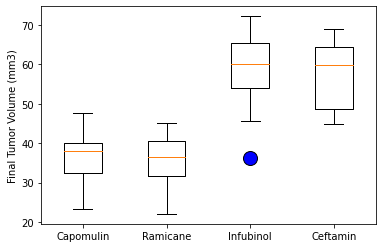

In [271]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

yellow_out = dict(markerfacecolor='blue', markersize=14)
plt.boxplot(tumor_list, labels = drug_treatment_list,flierprops=yellow_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

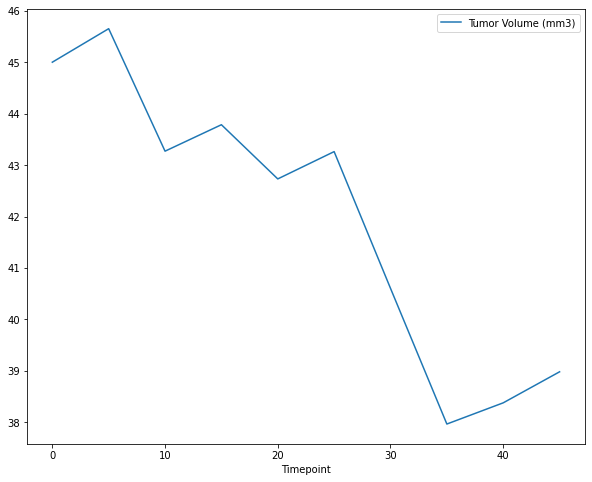

In [272]:
# Generate a line plot of tumor volume vs. time point for a single mouse 

# treated with Capomulin

########.  come back to this   ####
capomulin2 = drop_mouse_mdata_and_study_results_df.loc[drop_mouse_mdata_and_study_results_df["Drug Regimen"] == "Capomulin"]
capomulin2 = capomulin2.reset_index()
singlecapomulin = capomulin2.loc[capomulin2["Mouse ID"] == "b128"]
singlecapomulin = singlecapomulin.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
singlecapomulin = singlecapomulin.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
singlecapomulin.set_index('Timepoint').plot(figsize=(10, 8))


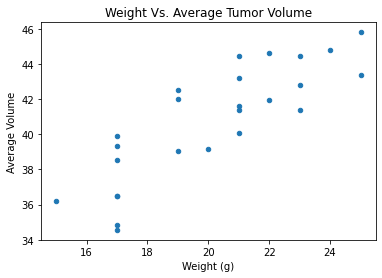

In [273]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
redcapomulin = capomulin2.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
avecap = pd.DataFrame(redcapomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avecap = avecap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avecap = avecap.set_index('Mouse ID')
avecap.plot(kind="scatter", x="Weight (g)", y="Average Volume",
              title="Weight Vs. Average Tumor Volume")

## Correlation and Regression

In [274]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
mouse_weight = avecap.iloc[:,0]
avg_tumor_volume = avecap.iloc[:,1]
corr = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation is {round(corr[0],2)}")

The correlation is 0.84


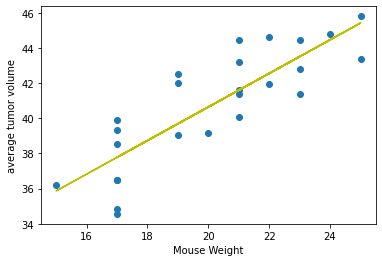

In [275]:
 x = avecap['Weight (g)']
y = avecap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + "x + "
plt.scatter(x,y)
plt.plot(x,regress_values,"y-")
plt.xlabel('Mouse Weight')
plt.ylabel('average tumor volume')
plt.show()

# Observations and Insights

In conclusion, the study indicates that Capomulin and Ramicane are the two most effective drugs to treat tumors in mice while Propriva is the least significant or standard treatment for the tumor infections.